# TD1 : polynômes de Newton

Le code ci-dessous premet de créer le polynôme de Newton qui envoie chacune des valeurs de la liste `lx` vers la valeur correspondante de la liste `ly`. 

In [1]:
from sympy import *
import numpy as np

x=Symbol('x')
init_printing()

In [2]:
def polNewton(lx,ly) :
    """
    polynôme de Newton qui envoie chacune des valeurs de la liste lx vers la liste ly.
    Si n est la longeur commune des deux liste lx et ly, alors ce polynôme est de degré au plus n-1. 
    
    Par exemple si f = x -> x**3 + 2*x**2 + 3*x + 4
    on voit que f est de degré 3 et que f(-2)=-2, f(0)=4, f(1)=10 et enfin f(2)=26. 
    
    Puisque les listes [-2,0,1,2] et [-2, 4, 10, 26] sont de longueur 4, 
    alors le polynôme de Newton associé à ces listes est f...
    
    >>> from sympy import *
    >>> x = Symbol('x')
    >>> f = polNewton([-2,0,1,2],[-2, 4, 10, 26])
    >>> print(f(x))
    x**3 + 2*x**2 + 3*x + 4
    >>> print([f(x) for x in [-2,0,1,2]])
    [-2, 4, 10, 26]
    >>> print(expand(f(x)))
     x**3 + 2*x**2 + 3*x + 4
    """
    n=len(lx) 
    lx=[sympify(_) for _ in lx]
    ly=[sympify(_) for _ in ly]
    # base de Newton (lx)
    bn = [lambda x, i=i : prod([x-lx[j] for j in range(i)]) for i in range(n)]
    # différences 
    diff      = np.zeros((n,n), dtype=Symbol)
    diff[:,0] = ly
    for j in range(1,n):
        for i in range(0,n-j):
            diff[i,j] = Rational( diff[i+1,j-1]-diff[i,j-1], lx[i+j]-lx[i])
    return lambda x : sum( [ diff[0,i] * bn[i](x) for i in range(0,n) ])

On remarquera que parce que l'on a pris la précaution de fournir une documentation détaillée, un appel à 

                polNewton?
                
permettra à l'utilisateur de découvrir comment utiliser cette fonction. 

De plus cette même documentation pourra être utilisée (utilitaire `pydoc`) pour générer un site web de documentation ou (utilitaire `pytest`) pour effecuer des tests de non-régression. 

In [ ]:
help(polNewton)

In [16]:
lx=[1,4,6]
ly=[1.5709, 1.5727, 1.5751]
f=polNewton(lx, ly)

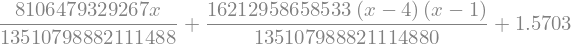

In [17]:
f(x)

In [23]:
n=len(lx) 
lx=[sympify(_) for _ in lx]
ly=[sympify(_) for _ in ly]
# base de Newton (lx)
bn = [lambda x, i=i : prod([x-lx[j] for j in range(i)]) for i in range(n)]
# interpolation
diff      = np.zeros((n,n), dtype=Symbol)
diff[:,0] = ly
for j in range(1,n):
    for i in range(0,n-j):
        diff[i,j] = (diff[i+1,j-1]-diff[i,j-1]) / (lx[i+j]-lx[i])

diff

array([[1.57090000000000, 0.000600000000000008, 0.000119999999999994],
       [1.57270000000000, 0.00119999999999998, 0],
       [1.57510000000000, 0, 0]], dtype=object)

In [22]:
(diff[0,2]*bn[2](x)).evalf()

In [21]:
(diff[0,0]*bn[0](x)).evalf()

# Exercice 
## Polynôme interpolateur pour 3 points
Calculer et représenter le polynôme de Newton associé au «nuage» de trois points
$ \begin{pmatrix}-1\\2\end{pmatrix} $
$ \begin{pmatrix}1\\0\end{pmatrix} $
et 
$ \begin{pmatrix}2\\-3\end{pmatrix} $. 




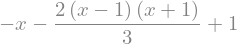

In [111]:
## le pol Newton de degré au plus 2
lx=[-1,1,2]
ly=[2,0,-3]
f=polNewton(lx,ly)
f(x)
#expand(f(x))

In [113]:
import matplotlib.pyplot as plt

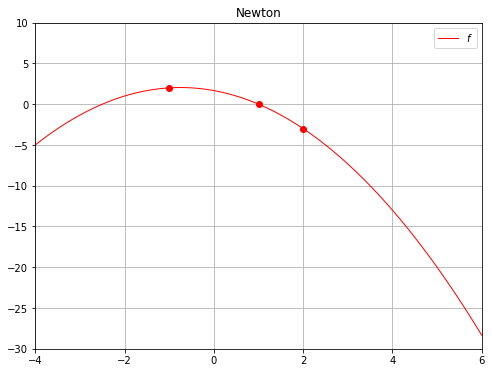

In [114]:
abscisses = np.linspace(-4,6, 120)
plt.figure(figsize=(8, 6))

# plot f
plt.plot(abscisses, f(abscisses), linewidth=1 , color='red' ,label='$f$') 

### les trois points communs...
plt.plot(lx,ly, 'ro')
plt.title('Newton')
plt.grid()
plt.axis([-4, 6, -30, 10])
plt.legend()
plt.show()

Newton pour [-1, 1, 2] et [2, 0, -3]
-x - 2*(x - 1)*(x + 1)/3 + 1
Newton pour [-1, 1, 2, 4] et [2, 0, -3, 0]
-x + 13*(x - 2)*(x - 1)*(x + 1)/30 - 2*(x - 1)*(x + 1)/3 + 1


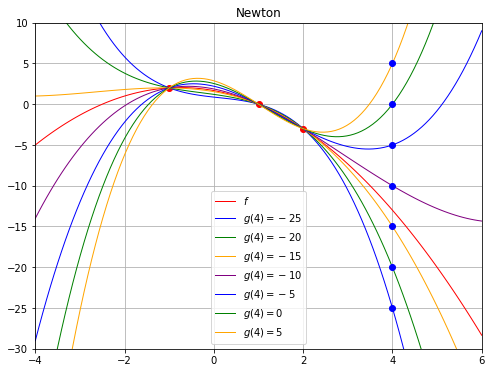

In [118]:

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_prop_cycle('color', ['blue', 'green', 'orange', 'purple'])

## le pol Newton de degré au plus 2
lx=[-1,1,2]
ly=[2,0,-3]
f=polNewton(lx,ly)
print("Newton pour %s et %s"%(lx,ly))
print(f(x))

# plot f
abscisses = np.linspace(-4,6, 120)
plt.plot(abscisses, f(abscisses), linewidth=1 , color='red' ,label='$f$') 

### les trois points communs...
plt.plot(lx,ly, 'ro')

# Ajout d'un point, pol de Newton de degré au plus 3
g=polNewton(lx+[4],ly+[0])
print("Newton pour %s et %s"%(lx+[4],ly+[0]))
print(g(x))

# change le 4ème point
for y in range(-25,10,5):
    g=polNewton(lx+[4],ly+[y])
    plt.plot(abscisses, g(abscisses), linewidth=1 , label="$g(%s)=%s$"%(4,y)) 
    plt.plot([4], [y], 'bo')

plt.title('Newton')
plt.grid()
plt.axis([-4, 6, -30, 10])
plt.legend()
plt.show()

## Que se passe t'il si tous les $y_i$ sont égaux à 1 ?

In [110]:
f=polNewton([1,2,3],[1,1,1])
print(f(x))
expand(f(x))

1
